In [2]:
import numpy as np
from scipy.io import wavfile
import cv2
import matplotlib.pyplot as plt

res = (512,256)

In [3]:
dmap = cv2.imread('dmaps/frame_0000.png',cv2.IMREAD_GRAYSCALE)
dmap = cv2.resize(dmap, res)
dmap = dmap/dmap.max()
dmap.shape

(256, 512)

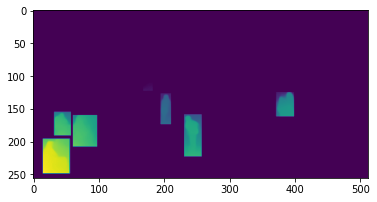

In [4]:
plt.imshow(dmap)

In [5]:
freqs = np.arange(1000,1000+(dmap.shape[0]*80),80)
freqs.max()

21400

In [6]:
#amplitudes * matrix
testa = np.array(((1,2,3),(1,2,3)))
testb = np.array((1,2))
np.multiply(testa,testb[:, np.newaxis])

#creating all the waves
time_x=np.arange(0, 1/res[0], 1.0/float(48000))

tones = np.cos(2.0 * np.pi * freqs.reshape(freqs.shape[0],1)* time_x)
tones.shape

(256, 94)

In [7]:
tone_y_stereo=np.vstack(( tones[0], tones[3]))
tone_y_stereo=tone_y_stereo.transpose()
wavfile.write('testAudio.wav', 48000, tone_y_stereo)

In [8]:
np.arange(10,1)

array([], dtype=int32)

In [9]:
np.sin(np.array((1,2,3)).reshape(3,1)*np.array((1,2,3)))

array([[ 0.84147098,  0.90929743,  0.14112001],
       [ 0.90929743, -0.7568025 , -0.2794155 ],
       [ 0.14112001, -0.2794155 ,  0.41211849]])

In [10]:
amps = dmap.T[30]
amps = amps.reshape(amps.shape[0],1)
succ = (amps*tones).sum(axis=0)
succ = succ/succ.max()


In [11]:
succ.shape

(94,)

In [12]:
a = np.array(((1,2),(5,6)))
b = np.array(((3,4),(7,8)))
np.hstack((a,b))
len(a)

2

In [13]:
tone_y_stereo=np.vstack(( 5*succ, succ))
tone_y_stereo=tone_y_stereo.transpose()
wavfile.write('testAudio.wav', 48000, tone_y_stereo)

In [14]:
tone_y_stereo.shape

(94, 2)

In [15]:
from fft import fft,ifft
import math

# time = np.linspace(0,1,920)
# succ = np.sin(2*np.pi*4*time) + 2*np.sin(2*np.pi*7*time)
succ0 = tones[0]

m = 2**(math.ceil(math.log2(succ.size)))
succpad = np.zeros((m))
succpad[:succ.size] = succ

f = np.fft.fft(succ)
s = np.fft.ifft(f)

(array([], dtype=int64),)

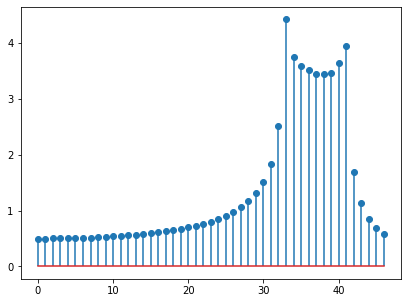

In [16]:
f = abs(f)[:f.shape[0]//2]
plt.figure(0, figsize=(15,5))
plt.subplot(121)
plt.stem(f)

np.where(f>100)

<StemContainer object of 3 artists>

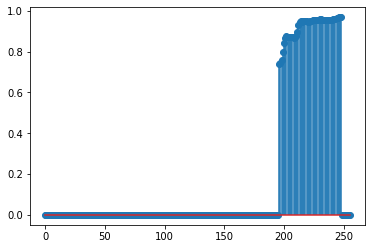

In [23]:
plt.stem(amps)

In [18]:
from vOICe import voice

In [19]:
out = voice('dmaps/frame_0000.png', tones, res)

In [20]:
out.shape[0]

48128

(array([], dtype=int64),)

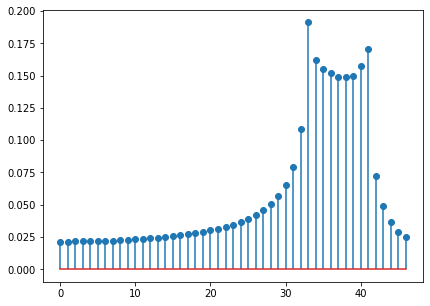

In [21]:
check = out.T[0,int(30*48000/res[0]):int(31*48000/res[0])]

f = np.fft.fft(check)
s = np.fft.ifft(f)
f = abs(f)[:f.shape[0]//2]
plt.figure(0, figsize=(15,5))
plt.subplot(121)
plt.stem(f)

np.where(f>100)

In [22]:
wavfile.write('testAudio.wav', 48000, out)

In [24]:
!pip install tqdm

     ---------------------------------------- 76.6/76.6 KB 4.1 MB/s eta 0:00:00
